# Linear Regression 

## Table of Contents

- [1. Introduction](#1-Introduction)
- [2. Data Generation and Visualization](#2-Data-Generation-and-Visualization)
- [3. Linear Regression Implementation "from scratch"](#3-Linear-Regression-Implementation-from-scratch)
- [4. Exact Solution using Normal Equation](#4-Exact-Solution-using-Normal-Equation)
- [5. Gradient Descent (Batch Gradient Descent)](#5-Gradient-Descent-Batch-Gradient-Descent)
- [6. Stochastic Gradient Descent (SGD)](#6-Stochastic-Gradient-Descent-SGD)
- [7. Convergence Speed Comparison](#7-Convergence-Speed-Comparison)
- [8. Discussion and Conclusions](#8-Discussion-and-Conclusions)
- [9. Conclusion](#9-Conclusion)

#### 0. Introduction
- This notebook is aimed at implementing linear regression from scratch using different optimization methods such as gradient descent and stochastic gradient descent (SGD).
- The goal of this project is to explore the implementation of linear regression using different optimization methods and visualize their convergence process.

#### **1. Linear Model**

Linear regression is described by the equation:

$$
\hat{y} = X \theta
$$

Where:
- $ X $ — feature matrix ($ m \times n $).
- $ \theta $ — parameter vector.
- $ \hat{y} $ — predicted values.

#### **2. Loss Function (MSE)**

Mean Squared Error (MSE) loss function:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

#### **3. Normal Equation Method**

Solution using the normal equation:

$$
\theta = (X^T X)^{-1} X^T y
$$

#### **4. Gradient Descent**

Gradient descent update rule:

$$
\theta = \theta - \alpha \frac{1}{m} X^T (X \theta - y)
$$

#### **5. Stochastic Gradient Descent (SGD)**

Mini-batch update rule for SGD:

$$
\theta = \theta - \alpha \left( \frac{1}{\text{batch\_size}} X_{\text{batch}}^T (X_{\text{batch}} \theta - y_{\text{batch}}) \right)
$$

#### **6. Regularization**

Regularization adds a penalty to large parameter values to prevent overfitting.

##### L2 Regularization (Ridge)

Loss function with L2 regularization:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 + \frac{\lambda}{2m} \|\theta\|^2
$$

##### L1 Regularization (Lasso)

Loss function with L1 regularization:

$$
J(\theta) = \frac{\lambda}{2m} \|\theta\|_1
$$

##### Changes in Methods:

1. **Normal Equation with L2 Regularization**:
   $$
   \theta = (X^T X + \lambda I)^{-1} X^T y
   $$

2. **Gradient Descen**t:
   - With L2 Regularization:
   $$
   \theta = \theta - \alpha \left( \frac{1}{m} X^T (X \theta - y) + \frac{\lambda}{m} \theta \right)
   $$
   - With L1 Regularization:
   $$
   \theta = \theta - \alpha \left( \frac{1}{m} X^T (X \theta - y) + \frac{\lambda}{m} \text{sign}(\theta) \right)
   $$


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    """
    Linear Regression:
    Learning methods:
    - 'normal': exact solution by normal equation
    - 'gradient_descent': gradient descent (including stochastic gradient descent and mini-batches)
    """

    def __init__(self, method='normal', alpha=0.01, n_iter=1000, batch_size=None, dynamic_step=False, s0=1, p=0.5):
        """
        :param method: Learning method ('normal' or 'gradient_descent')
        :param alpha: Learning rate (for gradient descent and SGD)
        :param n_iter: Number of iterations (for gradient descent and SGD)
        :param batch_size: Batch size (if None, classic gradient descent is used)
        :param dynamic_step: Whether to use a dynamic step size
        """
        self.method = method
        self.alpha = alpha
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.theta = None
        self.dynamic_step = dynamic_step  # Flag for using dynamic step
        self.s0 = s0  # Parameter for dynamic step
        self.p = p  # Parameter for dynamic step
        self.w_history = []  # Store weight history for visualization

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the linear regression model to the data X and y.
        :param X: np.ndarray, feature matrix (n_samples, n_features)
        :param y: np.ndarray, target vector (n_samples,)
        """
        X = np.hstack([X, np.ones((X.shape[0], 1))])

        if self.method == 'normal':
            self._normal_equation(X, y)
        elif self.method == 'gradient_descent':
            self._gradient_descent(X, y)
        else:
            raise ValueError("Invalid method. Use 'normal' or 'gradient_descent'.")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict values for new data.
        :param X: np.ndarray, feature matrix (n_samples, n_features)
        :return: np.ndarray, predicted values (n_samples,)
        """
        X = np.hstack([X, np.ones((X.shape[0], 1))])

        return X.dot(self.theta)

    def _normal_equation(self, X: np.ndarray, y: np.ndarray):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def _gradient_descent(self, X: np.ndarray, y: np.ndarray):
        self.theta = np.zeros(X.shape[1])
        m = len(y)
        
        batch_size = self.batch_size if self.batch_size else m

        for t in range(self.n_iter):
            # Calculate dynamic learning rate if enabled
            if self.dynamic_step:
                eta = self.alpha * (self.s0 / (self.s0 + t)) ** self.p  # Dynamic step size formula
            else:
                eta = self.alpha  # Fixed learning rate

        for _ in range(self.n_iter):
            batch_indices = np.random.choice(m, size=batch_size, replace=False)
            X_batch, y_batch = X[batch_indices], y[batch_indices]

            y_pred = X_batch.dot(self.theta)
            gradient = (1 / batch_size) * X_batch.T.dot(y_pred - y_batch)

            # Update weights
            self.theta -= eta * gradient
            self.w_history.append(self.theta.copy())  # Store weights for each iteration


#### **7. Visualization of Convergence Trajectories for Stochastic and Classical Gradient Descent**

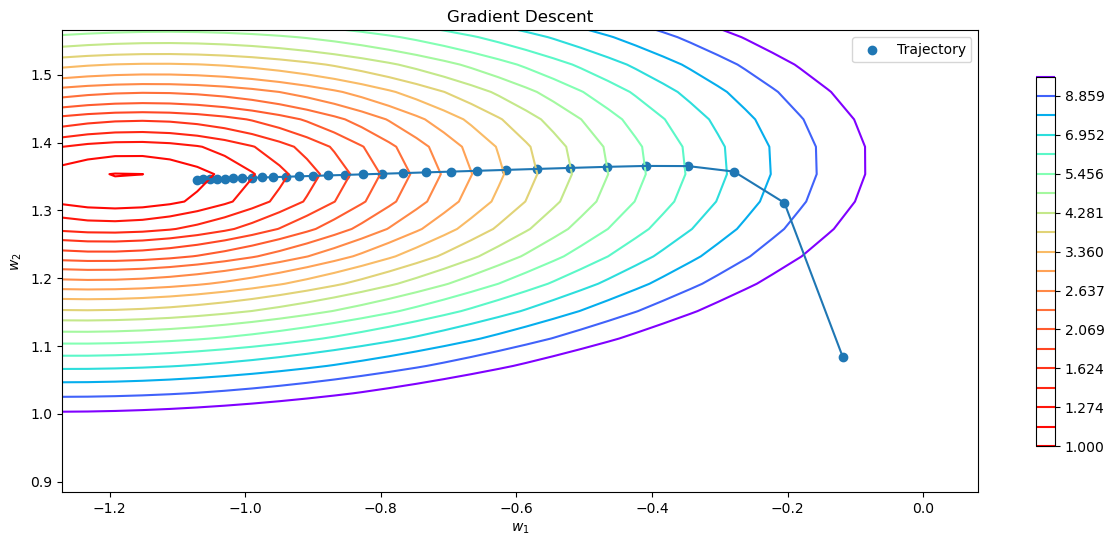

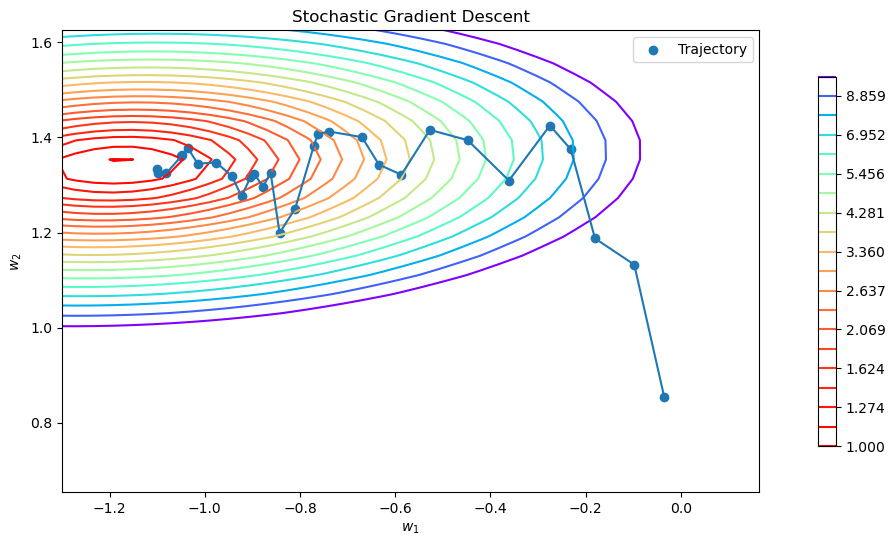

In [96]:

def plot_gradient(w_list, X, Y, w_true, title):
    A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

    plt.figure(figsize=(15, 6))
    plt.title(title)
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim((w_list[:, 0].min() - 0.2, w_list[:, 0].max() + 0.2))
    plt.ylim((w_list[:, 1].min() - 0.2, w_list[:, 1].max() + 0.2))
    plt.gca().set_aspect("equal")

    # Visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Visualize the trajectory
    #plt.scatter(w_true[0], w_true[1], c="r", label="True Weights")
    plt.scatter(w_list[:, 0], w_list[:, 1], label="Trajectory")
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.legend()
    plt.show()


# Generation dataset
n_features = 2
n_objects = 300

np.random.seed(404)

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-3, 3, (n_features))



##
# SGD
batch_size = 10
num_steps = 30
model_sgd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter=num_steps, batch_size=batch_size)
model_sgd.fit(X, Y)
w_list_sgd = np.array(model_sgd.w_history)  # Список весов на каждой итерации
##
# GD
model_gd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter=num_steps, batch_size=None)  # Full batch
model_gd.fit(X, Y)
w_list_gd = np.array(model_gd.w_history) 

## Plot


plot_gradient(w_list_gd, X, Y, w_true, "Gradient Descent")
plot_gradient(w_list_sgd, X, Y, w_true, "Stochastic Gradient Descent")


##### **Learning Rate Decay Formula:**

$$
\eta_t = \lambda \left( \frac{s_0}{s_0 + t} \right)^p
$$

where:
- $ \eta_t $ is the learning rate at iteration $ t $,
- $ \lambda $ is the initial learning rate (represented by the `alpha` parameter in the code),
- $ s_0 $ is a parameter that controls the initial rate of decay,
- $ p $ is a parameter that controls how quickly the learning rate decreases,
- $ t $ is the current iteration number.


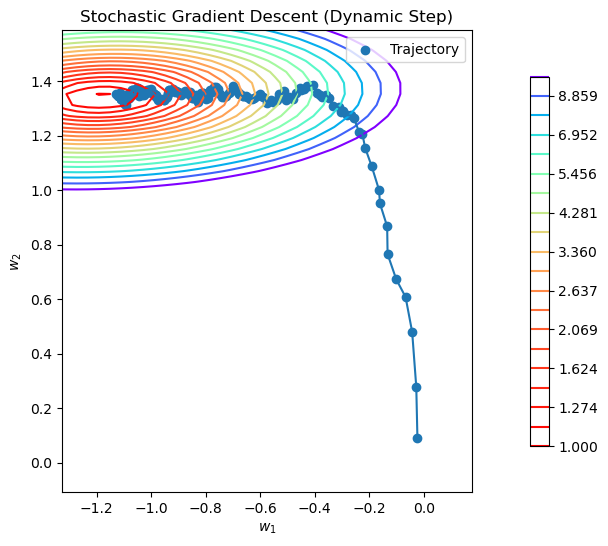

In [191]:
model_sgd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter= 200, batch_size=10, dynamic_step=True, s0=1, p=.3)
model_sgd.fit(X, Y)
w_list_sgd = np.array(model_sgd.w_history)

plot_gradient(w_list_sgd, X, Y, w_true, "Stochastic Gradient Descent (Dynamic Step)")